In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_heart = pd.read_csv('heart_disease_uci.csv') 

In [3]:
df_heart.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Column Descriptions:
**id**(Unique id for each patient)

**age** (Age of the patient in years)

**origin** (place of study)

**sex** (Male/Female)

**cp chest pain type** ([typical angina, atypical angina, non-anginal, asymptomatic])

**trestbps resting blood pressure** (resting blood pressure (in mm Hg on admission to the hospital))

**chol** (serum cholesterol in mg/dl)

**fbs** (if fasting blood sugar > 120 mg/dl)

**restecg** (resting electrocardiographic results)
           -- Values: [normal, stt abnormality, lv hypertrophy]
           
**thalach**: maximum heart rate achieved

**exang**: exercise-induced angina (True/ False)

**oldpeak**: ST depression induced by exercise relative to rest

**slope**: the slope of the peak exercise ST segment

**ca**: number of major vessels (0-3) colored by fluoroscopy

**thal**: [normal; fixed defect; reversible defect]

**num** : the predicted attribute if the person has heart disease 

In [4]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


**There seem to be null values in the dataset in some of the fields.**

In [5]:
df_heart.shape

(920, 16)

In [6]:
df_heart.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


Text(0.5, 0.98, 'Feature Distributions')

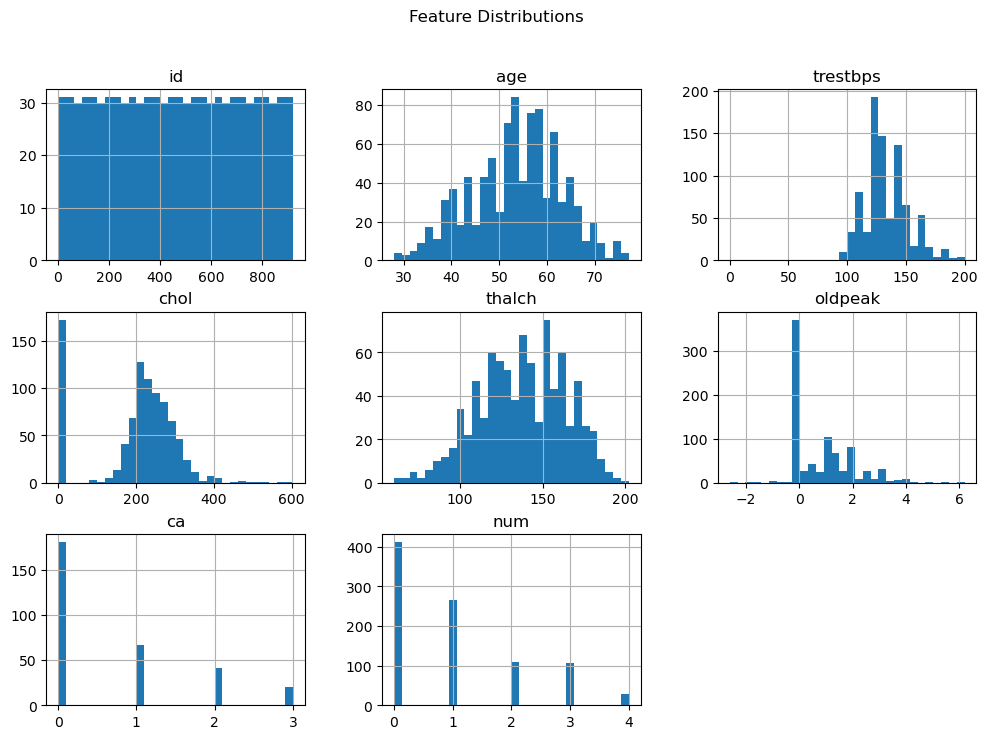

In [7]:
df_heart.hist(bins=30, figsize=(12,8))
plt.suptitle("Feature Distributions")

In [8]:
df_heart['age'].min(), df_heart['age'].max()

(28, 77)

In [9]:
df_heart['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [10]:
male_count = 726
female_count = 194

total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

# display the results
print(f'Male percentage i the data: {male_percentage:.2f}%')
print(f'Female percentage in the data : {female_percentages:.2f}%')

# Difference
difference_percentage = ((male_count - female_count)/female_count) * 100
print(f'Males are {difference_percentage:.2f}% more than female in the data.')

Male percentage i the data: 78.91%
Female percentage in the data : 21.09%
Males are 274.23% more than female in the data.


<Axes: xlabel='age', ylabel='Count'>

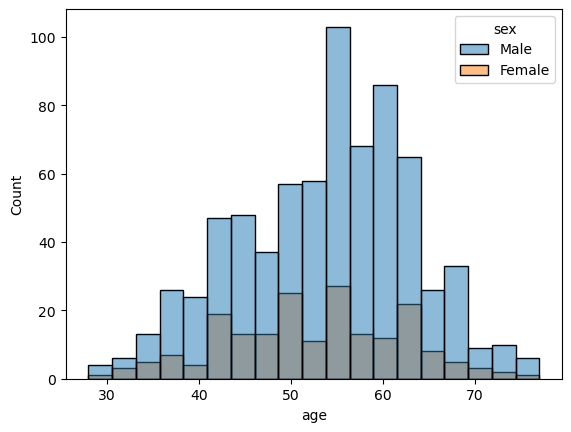

In [11]:
sns.histplot(data=df_heart, x='age', hue= 'sex')

The dataset is imbalanced by gender (more males).

The study/sample seems to focus on middle-aged to older adults (prime risk ages for heart disease, if this is heart-related data).

In [12]:
df_heart['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

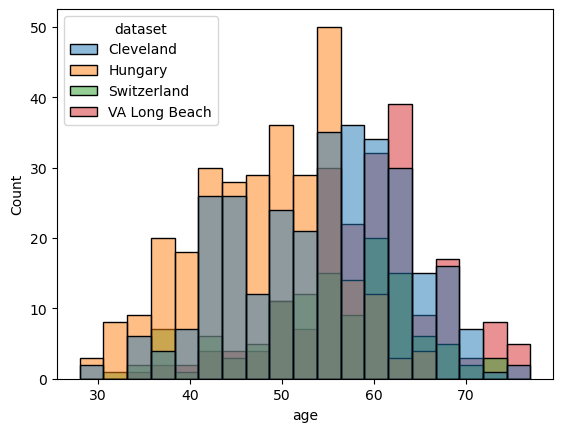

In [13]:
fig = sns.histplot(data=df_heart, x='age', hue= 'dataset')

In [14]:
df_heart['target'] = df_heart['num'].apply(lambda x: 0 if x == 0 else 1)

In [15]:
bins = [20, 40, 50, 60, 70, 80]  
labels = ['20-39','40-49', '50-59', '60-69', '70-79']

df_heart['age_bin'] = pd.cut(df_heart['age'], bins=bins, labels=labels, right=False)

# Check distribution
print(df_heart['age_bin'].value_counts())

age_bin
50-59    375
60-69    222
40-49    212
20-39     80
70-79     31
Name: count, dtype: int64


In [16]:
numeric_features = ['trestbps', 'chol', 'thalch', 'oldpeak']

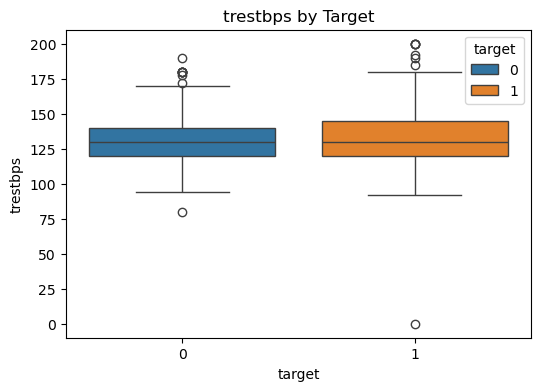

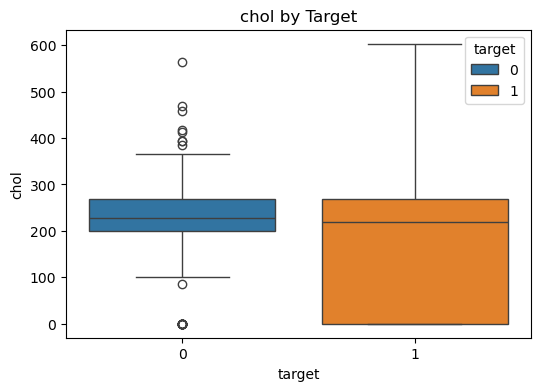

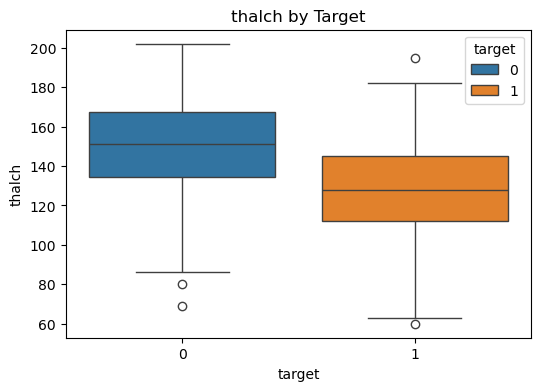

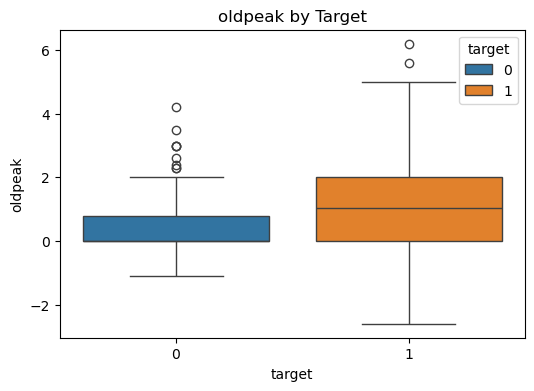

In [17]:
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='target', y=col, data=df_heart, hue='target')
    plt.title(f"{col} by Target")
    plt.show()

In [18]:
df_heart.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,target,age_bin
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0,60-69
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1,60-69
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1,60-69
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0,20-39
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0,40-49


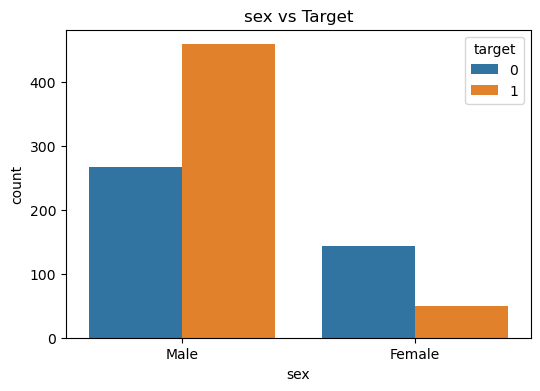

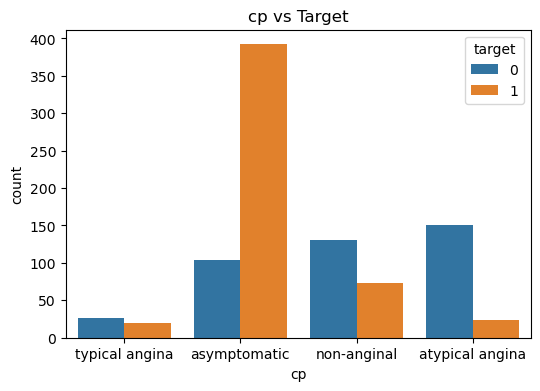

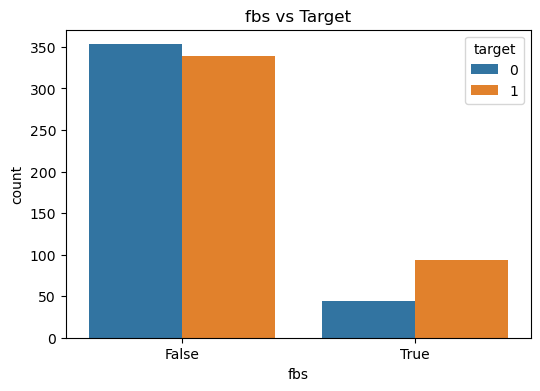

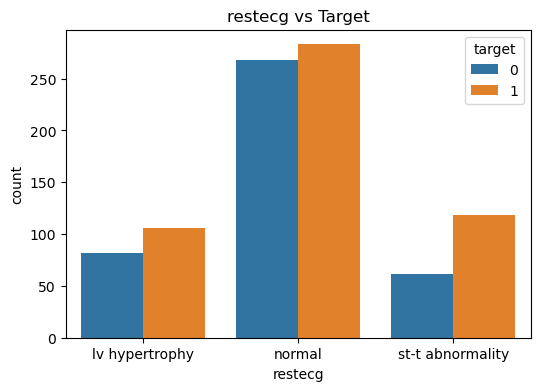

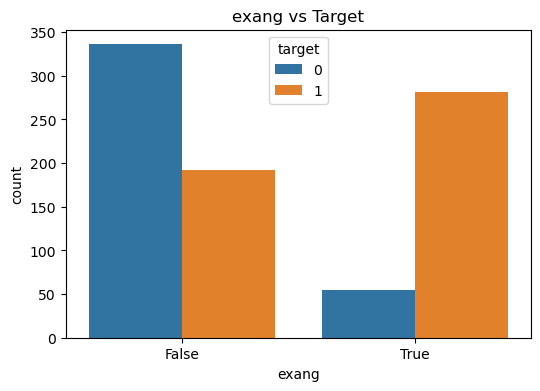

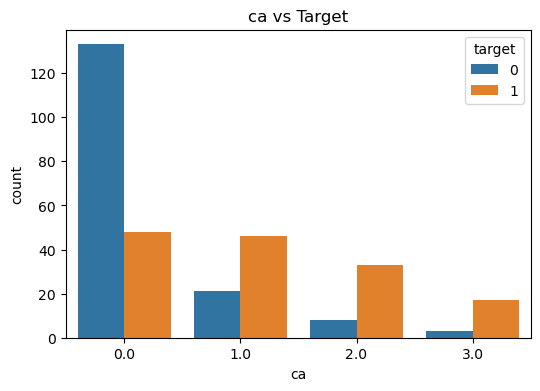

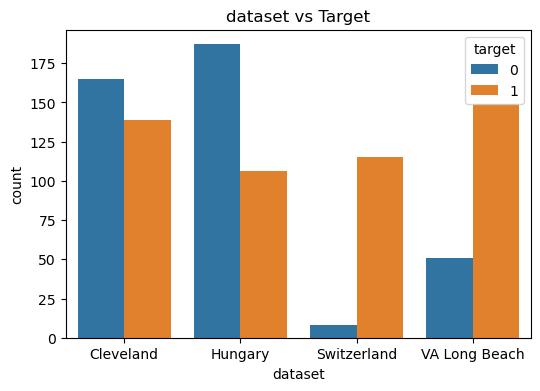

In [19]:
# List of categorical features (adjust based on your dataset)
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang','ca','dataset']  

# Loop through categorical features
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='target', data=df_heart)
    plt.title(f"{col} vs Target")
    plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2252\3872109181.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_target["proportion"] = age_target["count"] / age_target.groupby("age_bin")["count"].transform("sum")


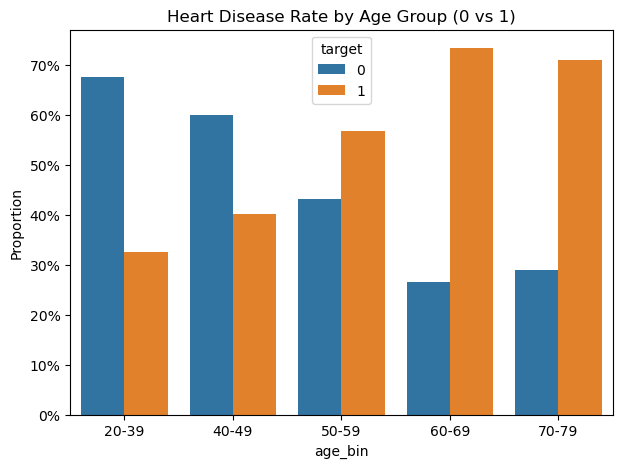

In [20]:
from matplotlib.ticker import PercentFormatter
age_target = (
    df_heart.groupby(["age_bin", "target"], observed = True)
    .size()
    .reset_index(name="count")
)

# normalize within each age_bin
age_target["proportion"] = age_target["count"] / age_target.groupby("age_bin")["count"].transform("sum")

# plot
plt.figure(figsize=(7,5))
ax = sns.barplot(x="age_bin", y="proportion", hue="target", data=age_target)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # show 0–100% instead of 0–1
plt.ylabel("Proportion")
plt.title("Heart Disease Rate by Age Group (0 vs 1)")
plt.show()

In [21]:
df_heart['restecg'].value_counts() 

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

**Dealing with null values**

In [22]:
df_heart['restecg'] = df_heart['restecg'].fillna(df_heart['restecg'].mode()[0])

In [23]:
df_heart.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       0
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
target        0
age_bin       0
dtype: int64

In [24]:
df_heart.drop('id', axis=1, inplace = True)

In [25]:
df_heart.drop(['num'], axis=1, inplace=True)

Looking at the age and gender to fill up 'trestbps', 'chol', 'thalach', 'oldpeak' with median values

In [26]:
num_cols_to_impute = ['trestbps', 'chol', 'thalch', 'oldpeak', 'fbs', 'exang' ]

for col in num_cols_to_impute:
    # age_bin + sex median
    df_heart[col] = df_heart[col].fillna(
        df_heart.groupby(['age_bin', 'sex'])[col].transform('median')
    )
   

C:\Users\USER\AppData\Local\Temp\ipykernel_2252\188774284.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_heart.groupby(['age_bin', 'sex'])[col].transform('median')
C:\Users\USER\AppData\Local\Temp\ipykernel_2252\188774284.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_heart.groupby(['age_bin', 'sex'])[col].transform('median')
C:\Users\USER\AppData\Local\Temp\ipykernel_2252\188774284.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defaul

In [27]:
df_heart.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope       309
ca          611
thal        486
target        0
age_bin       0
dtype: int64

In [28]:
df_heart.fillna({col: df_heart[col].mode()[0] for col in ["slope", "ca", "thal"]}, inplace=True)

In [29]:
df_heart.isnull().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
age_bin     0
dtype: int64

In [30]:
df_heart.corr(numeric_only=True)["target"].sort_values(ascending=False)

target      1.000000
oldpeak     0.376380
age         0.282700
ca          0.164755
trestbps    0.104978
chol       -0.230686
thalch     -0.389238
Name: target, dtype: float64

Understanding important features for model training.

In [31]:
from sklearn.model_selection import train_test_split
df_heart["sex_cp_asymptomatic"] = (df_heart["sex"] == "Male") & (df_heart["cp"] == "asymptomatic")
df_heart["age_oldpeak"] = df_heart["age"] * df_heart["oldpeak"]
X = df_heart.drop("target", axis=1)   # features
y = df_heart["target"]   

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [1]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify feature types
num_features = ["age", "trestbps", "chol", "thalch", "oldpeak", "age_oldpeak"]
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang','ca','dataset',"sex_cp_asymptomatic"]  

# Preprocessing: scale nums, one-hot encode cats
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ])


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", LogisticRegression(penalty="l1", solver="saga", max_iter=5000))
])

# try different C values
param_grid = {"model__C": [0.001, 0.01, 0.1, 1, 10, 100, 150,300]}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("Best C:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best C: {'model__C': 100}
Best CV Score: 0.8247012318440892


In [35]:


y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8478260869565217
Test ROC AUC: 0.9226446676231468

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        82
           1       0.84      0.90      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



In [36]:
best_model = grid.best_estimator_.named_steps["model"]
coefs = best_model.coef_[0]

# get feature names from preprocessor
ohe = grid.best_estimator_.named_steps["prep"].transformers_[1][1]  # OneHotEncoder
ohe_features = list(ohe.get_feature_names_out(cat_cols))
all_features = num_features + ohe_features

feat_importance = pd.DataFrame({"feature": all_features, "coef": coefs})
feat_importance["abs_coef"] = feat_importance["coef"].abs()
print(feat_importance.sort_values("abs_coef", ascending=False).head(10))


                feature      coef  abs_coef
26  dataset_Switzerland  2.583792  2.583792
4               oldpeak  1.530079  1.530079
9       cp_asymptomatic  1.447095  1.447095
24    dataset_Cleveland -1.425384  1.425384
10   cp_atypical angina -1.001722  1.001722
6           age_oldpeak -0.976409  0.976409
8              sex_Male  0.809166  0.809166
25      dataset_Hungary -0.708870  0.708870
7            sex_Female -0.685768  0.685768
21               ca_1.0  0.601203  0.601203


In [37]:
coefs = {
    "dataset_Switzerland": 2.48,
    "cp_asymptomatic": 1.08,
    "dataset_Cleveland": -0.89,
    "cp_atypical angina": -0.81,
    "oldpeak": 0.60,
    "ca": 0.59,
    "sex_Male": 0.55,
    "sex_Female": -0.55,
    "exang_True": 0.49
}

# compute odds ratios
odds_ratios = {f: np.exp(v) for f, v in coefs.items()}

for f, or_val in odds_ratios.items():
    change = (or_val - 1) * 100
    direction = "higher" if change > 0 else "lower"
    print(f"{f}: OR = {or_val:.2f} → {abs(change):.1f}% {direction} odds of heart disease")

dataset_Switzerland: OR = 11.94 → 1094.1% higher odds of heart disease
cp_asymptomatic: OR = 2.94 → 194.5% higher odds of heart disease
dataset_Cleveland: OR = 0.41 → 58.9% lower odds of heart disease
cp_atypical angina: OR = 0.44 → 55.5% lower odds of heart disease
oldpeak: OR = 1.82 → 82.2% higher odds of heart disease
ca: OR = 1.80 → 80.4% higher odds of heart disease
sex_Male: OR = 1.73 → 73.3% higher odds of heart disease
sex_Female: OR = 0.58 → 42.3% lower odds of heart disease
exang_True: OR = 1.63 → 63.2% higher odds of heart disease


In [38]:
X_train.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,age_bin,sex_cp_asymptomatic,age_oldpeak
640,53,Male,Switzerland,non-anginal,160.0,0.0,0.0,lv hypertrophy,122.0,True,0.0,flat,0.0,reversable defect,50-59,False,0.0
743,74,Male,VA Long Beach,non-anginal,145.0,0.0,False,normal,114.0,1.0,1.6,flat,0.0,normal,70-79,False,118.4
890,53,Male,VA Long Beach,asymptomatic,124.0,243.0,False,normal,122.0,True,2.0,flat,0.0,reversable defect,50-59,True,106.0
270,61,Male,Cleveland,asymptomatic,140.0,207.0,False,lv hypertrophy,138.0,True,1.9,upsloping,1.0,reversable defect,60-69,True,115.9
654,56,Male,Switzerland,non-anginal,155.0,0.0,False,st-t abnormality,99.0,False,0.0,flat,0.0,normal,50-59,False,0.0


**slimmed down xgboost**

In [39]:
selected_features = ["oldpeak", "age_oldpeak", "ca", "sex", "cp", "dataset"]

X_train_sel = X_train[selected_features]
X_test_sel  = X_test[selected_features]


In [40]:
num_features_sel = ["oldpeak", "age_oldpeak", "ca"]
cat_features_sel = ["sex", "cp", "dataset"]

In [41]:
preprocessor_sel = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features_sel),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features_sel)
    ])

In [42]:
from xgboost import XGBClassifier
xgb_sel = Pipeline(steps=[
    ("prep", preprocessor_sel),
    ("model", XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    ))
])

In [43]:
xgb_sel.fit(X_train_sel, y_train)
y_pred_sel = xgb_sel.predict(X_test_sel)
y_pred_proba_sel = xgb_sel.predict_proba(X_test_sel)[:,1]

C:\Anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:00:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [44]:

print("Test Accuracy:", accuracy_score(y_test, y_pred_sel))
print("Test ROC AUC:", roc_auc_score(y_test, y_pred_proba_sel))
print(classification_report(y_test, y_pred_sel))

Test Accuracy: 0.8369565217391305
Test ROC AUC: 0.9131994261119082
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        82
           1       0.82      0.90      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



**XGBoost Overall**

In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# 1. Baseline: use all features
xgb_all = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", XGBClassifier(
        n_estimators=300, 
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    ))
])

xgb_all.fit(X_train, y_train)
y_pred_all = xgb_all.predict(X_test)
y_pred_proba_all = xgb_all.predict_proba(X_test)[:,1]

print("XGBoost (All Features)")
print("Test Accuracy:", accuracy_score(y_test, y_pred_all))
print("Test ROC AUC:", roc_auc_score(y_test, y_pred_proba_all))
print(classification_report(y_test, y_pred_all))

XGBoost (All Features)
Test Accuracy: 0.8586956521739131
Test ROC AUC: 0.9140363462458154
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        82
           1       0.87      0.88      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



C:\Anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:02:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


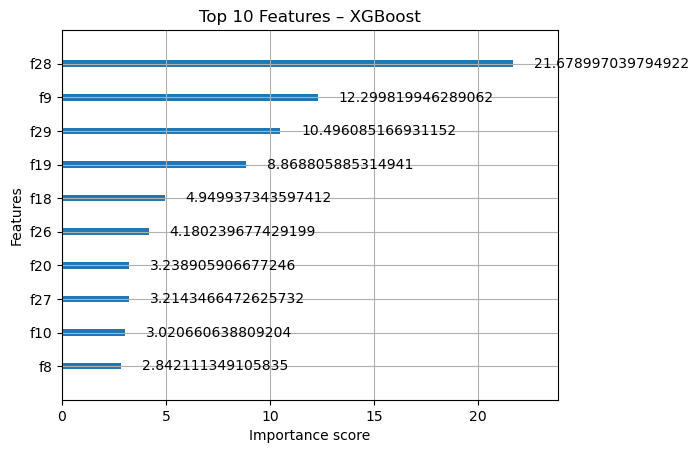

In [47]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

model = xgb_all.named_steps["model"]  # trained XGBClassifier
plot_importance(model, importance_type="gain", max_num_features=10)
plt.title("Top 10 Features – XGBoost")
plt.show()

In [50]:
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(74), np.int64(1): np.int64(110)}


**EDA**

**Univariate Analysis**

In [25]:
'''rate_by_age = df_heart.groupby('age_bin', observed = True)['target'].mean()
print(rate_by_age)
rate_by_age.plot(kind='bar', color='darkorange')
plt.ylabel("Proportion with Heart Disease")
plt.title("Heart Disease Rate by Age Group")
plt.show()'''

'rate_by_age = df_heart.groupby(\'age_bin\', observed = True)[\'target\'].mean()\nprint(rate_by_age)\nrate_by_age.plot(kind=\'bar\', color=\'darkorange\')\nplt.ylabel("Proportion with Heart Disease")\nplt.title("Heart Disease Rate by Age Group")\nplt.show()'

Shows heart disease is more common in higher age groups - 50-79

target         0         1
sex                       
Female  0.742268  0.257732
Male    0.367769  0.632231


<Figure size 600x400 with 0 Axes>

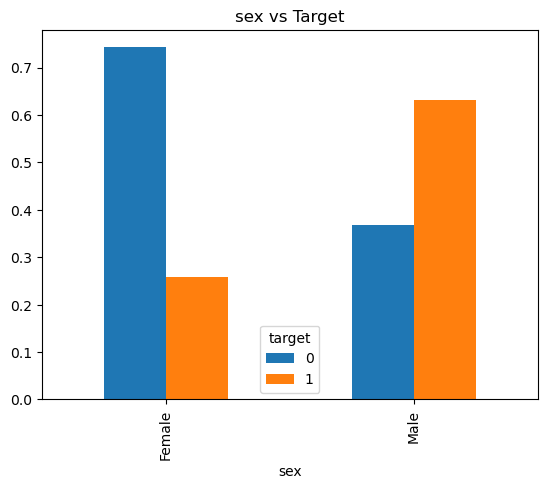

target                  0         1
cp                                 
asymptomatic     0.209677  0.790323
atypical angina  0.862069  0.137931
non-anginal      0.642157  0.357843
typical angina   0.565217  0.434783


<Figure size 600x400 with 0 Axes>

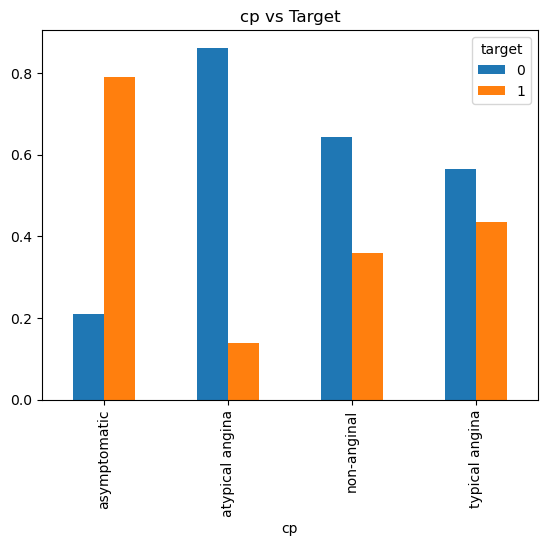

target         0         1
fbs                       
False   0.469309  0.530691
True    0.318841  0.681159


<Figure size 600x400 with 0 Axes>

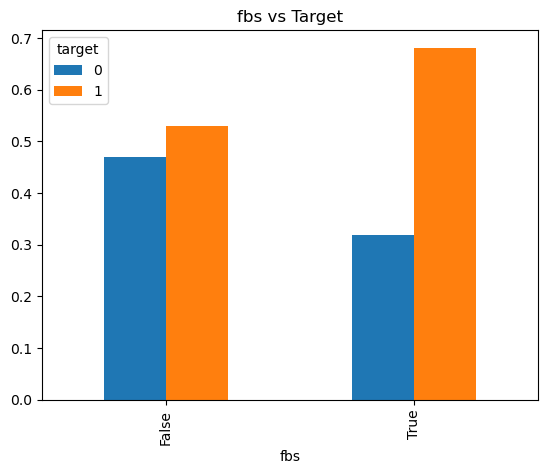

target                   0         1
restecg                             
lv hypertrophy    0.436170  0.563830
normal            0.484629  0.515371
st-t abnormality  0.340782  0.659218


<Figure size 600x400 with 0 Axes>

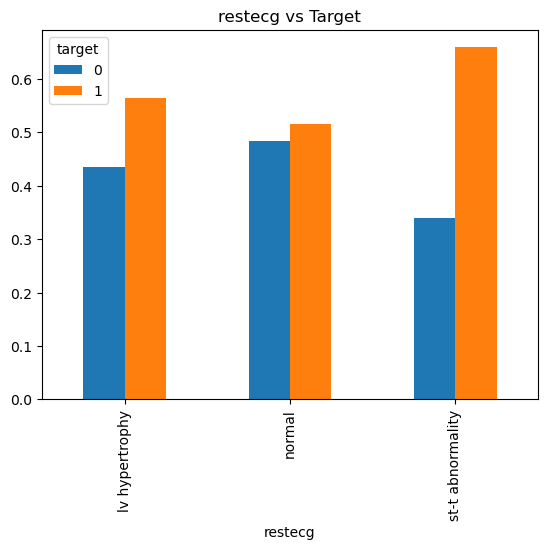

target         0         1
exang                     
False   0.626354  0.373646
True    0.174863  0.825137


<Figure size 600x400 with 0 Axes>

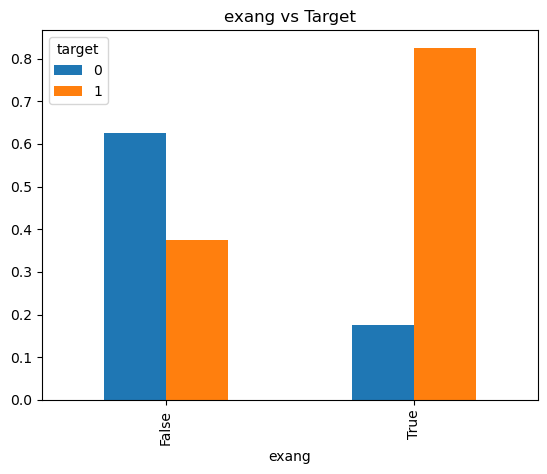

In [26]:

cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang']  

# Loop through categorical features
for col in cat_cols:
    rate_by_col =df_heart.groupby(col, observed = True)['target'].value_counts(normalize = True).unstack()
    print(rate_by_col)
    plt.figure(figsize=(6,4))
    rate_by_col.plot(kind='bar')
    plt.title(f"{col} vs Target")
    plt.show()


In [27]:
df_heart['restecg'].value_counts() 

restecg
normal              553
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

Indicates data skewness because most of the people who tested came in with normal ecg

**Important observations after univariate analysis**
1. People of older age group (50-59 and 60-69) have more chances of getting a heart disease.
2. Asymptotic chest pain is one of the important predictors of heart disease. People with asymptotic chest pain are more vulnerable to heart disease.
3. Patients with exercise-induced angina (exang=True) are predominantly in the disease group.
4. So the three important features are age, gender, cp, exang

**Bivariate Analysis**

**Observation after box plots** 
1. Heart disease is most common among patients aged 50–75, while it is rare below 30. Patients with disease also show a lower maximum heart rate (thalach), reflecting reduced exercise tolerance.
2. Higher oldpeak values are strongly linked with heart disease.


In [96]:
df_heart

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,Severity Level,age_bin,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0,60-69,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2,60-69,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1,60-69,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0,20-39,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0,40-49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,1,50-59,1
916,917,62,Male,VA Long Beach,typical angina,135.0,139.0,False,st-t abnormality,128.0,1.0,1.4,0,60-69,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,2,50-59,1
918,919,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,132.0,0.0,0.8,0,50-59,0


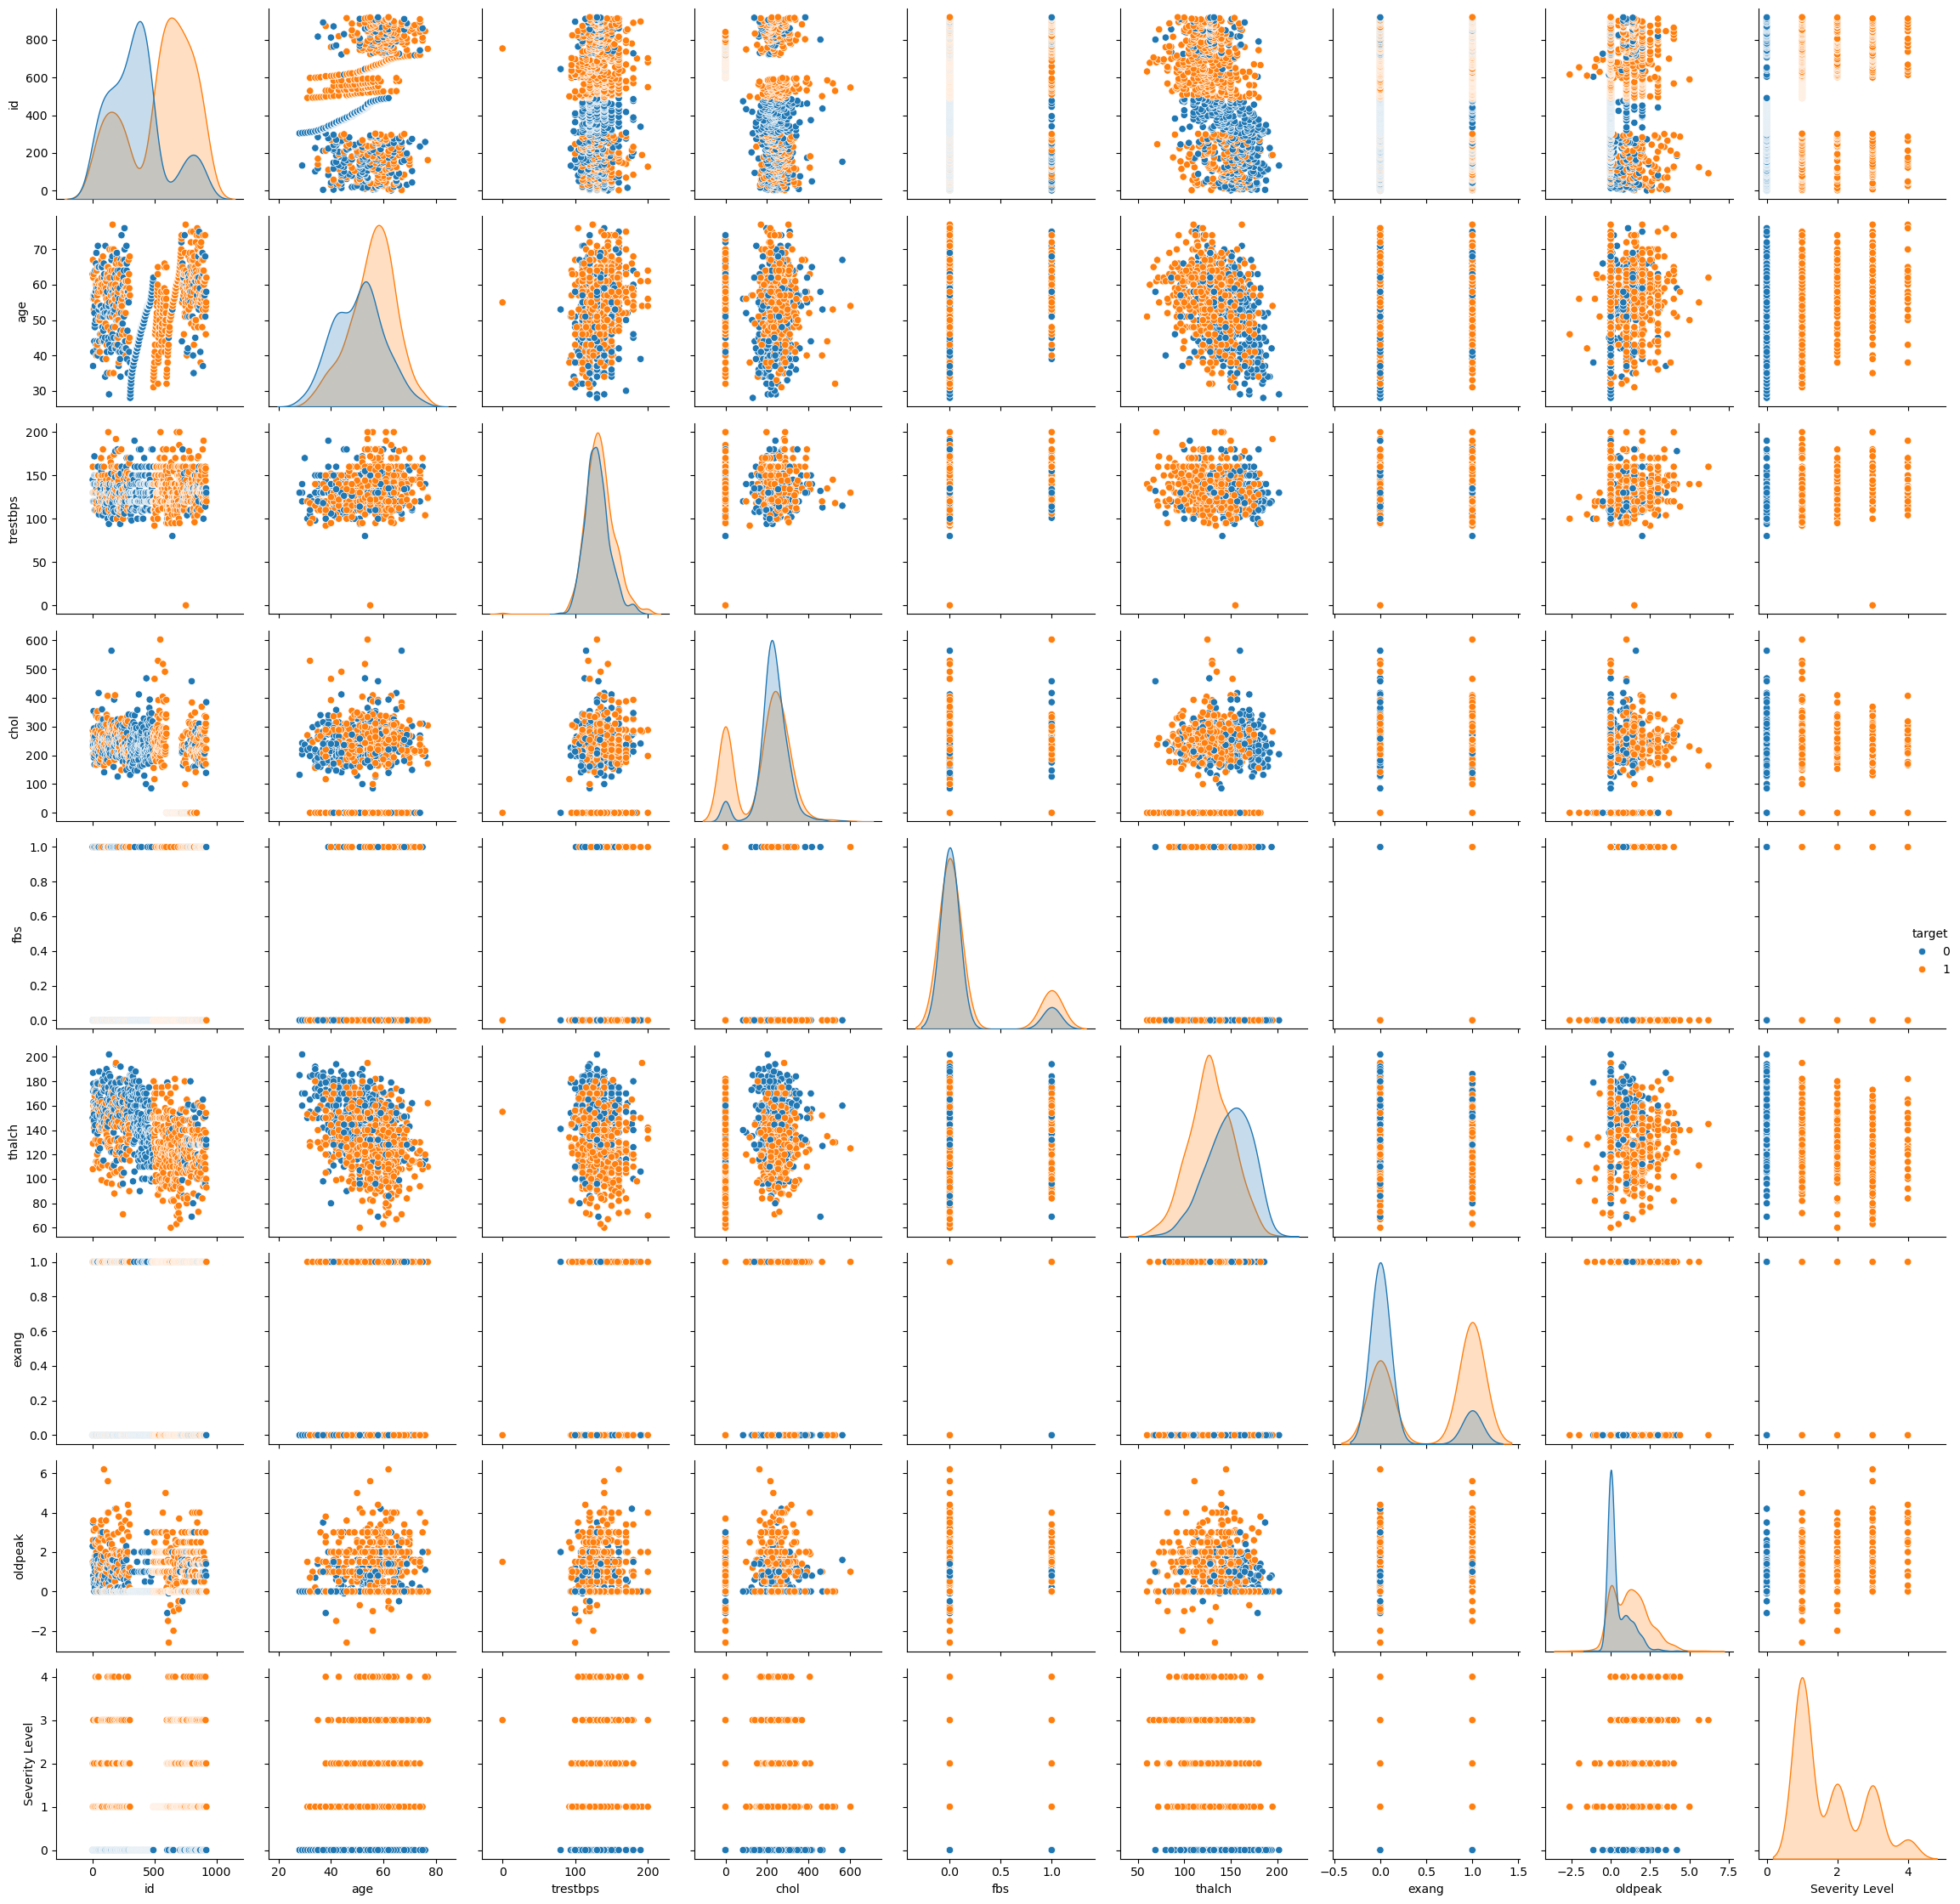

In [100]:
numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
sns.pairplot(data = df_heart, hue = 'target')
plt.tight_layout()
#plt.savefig("plots/my_plot.png", dpi=300, bbox_inches="tight") 

In [102]:
df_heart

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,Severity Level,age_bin,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0,60-69,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2,60-69,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1,60-69,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0,20-39,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0,40-49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,1,50-59,1
916,917,62,Male,VA Long Beach,typical angina,135.0,139.0,False,st-t abnormality,128.0,1.0,1.4,0,60-69,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,2,50-59,1
918,919,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,132.0,0.0,0.8,0,50-59,0


In [28]:
df_heart[numeric_features + ['target']].corr()['target'].sort_values(ascending=False)

target      1.000000
oldpeak     0.376380
age         0.282700
trestbps    0.104978
chol       -0.230686
thalch     -0.389238
Name: target, dtype: float64

In [29]:
categorical_cols = ['age_bin', 'sex', 'cp', 'exang']
df_encoded = pd.get_dummies(df_heart, columns=categorical_cols, drop_first=False, dtype=int)
df_encoded.head()

,id,age,dataset,trestbps,chol,fbs,restecg,thalch,oldpeak,Severity Level,...,age_bin_60-69,age_bin_70-79,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,exang_False,exang_True
0,1,63,Cleveland,145.0,233.0,True,lv hypertrophy,150.0,2.3,0,...,1,0,0,1,0,0,0,1,1,0
1,2,67,Cleveland,160.0,286.0,False,lv hypertrophy,108.0,1.5,2,...,1,0,0,1,1,0,0,0,0,1
2,3,67,Cleveland,120.0,229.0,False,lv hypertrophy,129.0,2.6,1,...,1,0,0,1,1,0,0,0,0,1
3,4,37,Cleveland,130.0,250.0,False,normal,187.0,3.5,0,...,0,0,0,1,0,0,1,0,1,0
4,5,41,Cleveland,130.0,204.0,False,lv hypertrophy,172.0,1.4,0,...,0,0,1,0,0,1,0,0,1,0


In [30]:
df_encoded.columns

Index(['id', 'age', 'dataset', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'oldpeak', 'Severity Level', 'target', 'age_bin_20-39', 'age_bin_40-49',
       'age_bin_50-59', 'age_bin_60-69', 'age_bin_70-79', 'sex_Female',
       'sex_Male', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'exang_False', 'exang_True'],
      dtype='object')

In [31]:
df_encoded.drop(['sex_Female', 'exang_False'], axis = 1, inplace = True)

In [32]:
#df_encoded.drop(['id', 'age', 'dataset'], axis = 1, inplace = True)
df_encoded.drop(['fbs', 'restecg'], axis = 1, inplace = True)

In [33]:
df_encoded.columns

Index(['id', 'age', 'dataset', 'trestbps', 'chol', 'thalch', 'oldpeak',
       'Severity Level', 'target', 'age_bin_20-39', 'age_bin_40-49',
       'age_bin_50-59', 'age_bin_60-69', 'age_bin_70-79', 'sex_Male',
       'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'exang_True'],
      dtype='object')

In [34]:
X = df_encoded.drop(columns=['target','id','dataset'], errors='ignore')
y = df_encoded['target'].astype(int)

In [35]:
num_cols = [c for c in ['trestbps','chol','thalch','oldpeak','Severity Level'] if c in X.columns]
bin_cols = [c for c in X.columns if c not in num_cols] 

In [36]:
assert all(c in X.columns for c in num_cols)
assert set(num_cols).isdisjoint(set(bin_cols))

In [47]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
pre = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('bin', 'passthrough', bin_cols),
    ],
    remainder='drop'
)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(
    n_estimators=200,
    max_samples='auto',
    contamination='auto',  # will be tuned
    max_features=1.0,
    bootstrap=False,
    n_jobs=-1,
    random_state=42
)

pipe = Pipeline([
    ('pre', pre),
    ('iforest', iforest),
])


In [45]:
from sklearn.metrics import recall_score
def recall_on_anomaly(estimator, X, y_true):
    y_pred = estimator.predict(X)               # -1 (outlier), 1 (inlier)
    y_pred = (y_pred == -1).astype(int)         # 1 = anomaly, 0 = normal
    return recall_score(y_true, y_pred, pos_label=1)

In [83]:
param_grid = {
    'iforest__n_estimators': [300],          # start here; can try 100/300 if needed
    'iforest__max_samples': ['auto', 0.6, 0.8, 1.0],
    'iforest__max_features': [0.5, 0.75, 1.0],
    'iforest__contamination': [0.05, 0.1, 0.15, 0.3,'auto'],
}

In [84]:
grid = GridSearchCV(
     estimator=pipe,
    param_grid=param_grid,
    scoring=recall_on_anomaly,
    cv=5,
    n_jobs=-1,
    verbose=1
)


In [85]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['trestbps',
                                                                          'chol',
                                                                          'thalch',
                                                                          'oldpeak',
                                                                          'Severity '
                                                                          'Level']),
                                                                        ('bin',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'age_bin_20-39',
                                                                          'age_bin_40-49',
                                                                          'age_bin_50-59',
                                                                          'age_bin_60-69',
                                                                          'age_bin_70-79',
                                                                          'sex_Male',
                                                                          'cp_asymptomatic',
                                                                          'cp_atypical '
                                                                          'angina',
                                                                          'cp_non-anginal',
                                                                          'cp_typic...
                                                                          'angina',
                                                                          'exang_True'])])),
                                       ('iforest',
                                        IsolationForest(n_estimators=200,
                                                        n_jobs=-1,
                                                        random_state=42))]),
             n_jobs=-1,
             param_grid={'iforest__contamination': [0.05, 0.1, 0.15, 0.3,
                                                    'auto'],
                         'iforest__max_features': [0.5, 0.75, 1.0],
                         'iforest__max_samples': ['auto', 0.6, 0.8, 1.0],
                         'iforest__n_estimators': [300]},
             scoring=<function recall_on_anomaly at 0x00000204445ABCE0>,
             verbose=1)

In [86]:
best_iso = grid.best_estimator_

print("Best params (by recall):", grid.best_params_)

Best params (by recall): {'iforest__contamination': 0.3, 'iforest__max_features': 1.0, 'iforest__max_samples': 1.0, 'iforest__n_estimators': 300}


In [87]:
test_scores = best_iso.decision_function(X_test)

In [88]:
anomaly_likelihood = -test_scores

In [89]:
full_scores = best_iso.decision_function(X)        # higher=more normal
df_encoded['anomaly_score'] = -full_scores                  # higher=more anomalous
df_encoded['outlier_iso']   = best_iso.predict(X)   

In [90]:
final_cols = [
    'trestbps','chol','thalch','oldpeak','Severity Level',
    'age_bin_20-39','age_bin_40-49','age_bin_50-59','age_bin_60-69','age_bin_70-79','sex_Male',
    'cp_asymptomatic','cp_atypical angina','cp_non-anginal','cp_typical angina',
    'exang_True'
]

In [91]:
topN = 15
display(df_encoded.sort_values('anomaly_score', ascending=False)
          [final_cols + ['target','anomaly_score','outlier_iso']]
          .head(topN))

,trestbps,chol,thalch,oldpeak,Severity Level,age_bin_20-39,age_bin_40-49,age_bin_50-59,age_bin_60-69,age_bin_70-79,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,exang_True,target,anomaly_score,outlier_iso
211,120.0,231.0,182.0,3.8,4,1,0,0,0,0,1,0,0,0,1,1,1,0.157277,-1
597,95.0,0.0,127.0,0.7,1,1,0,0,0,0,1,0,0,0,1,0,1,0.129404,-1
845,104.0,216.0,120.0,3.5,4,0,0,0,0,1,1,0,0,1,0,0,1,0.124446,-1
857,145.0,216.0,114.0,1.6,3,0,0,0,0,1,1,0,0,0,1,1,1,0.118118,-1
601,105.0,0.0,166.0,2.8,2,1,0,0,0,0,0,1,0,0,0,0,1,0.116852,-1
306,170.0,237.0,170.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.109838,-1
42,160.0,302.0,162.0,0.4,0,0,0,0,0,1,0,0,1,0,0,0,0,0.105135,-1
718,160.0,0.0,121.0,0.0,1,0,0,0,0,1,0,0,0,1,0,0,1,0.102513,-1
719,145.0,0.0,123.0,1.3,1,0,0,0,0,1,1,0,1,0,0,0,1,0.101843,-1
233,120.0,269.0,121.0,0.2,0,0,0,0,0,1,0,0,1,0,0,1,0,0.101258,-1


In [92]:
X

,age,trestbps,chol,thalch,oldpeak,Severity Level,age_bin_20-39,age_bin_40-49,age_bin_50-59,age_bin_60-69,age_bin_70-79,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,exang_True
0,63,145.0,233.0,150.0,2.3,0,0,0,0,1,0,1,0,0,0,1,0
1,67,160.0,286.0,108.0,1.5,2,0,0,0,1,0,1,1,0,0,0,1
2,67,120.0,229.0,129.0,2.6,1,0,0,0,1,0,1,1,0,0,0,1
3,37,130.0,250.0,187.0,3.5,0,1,0,0,0,0,1,0,0,1,0,0
4,41,130.0,204.0,172.0,1.4,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,127.0,333.0,154.0,0.0,1,0,0,1,0,0,0,1,0,0,0,0
916,62,135.0,139.0,128.0,1.4,0,0,0,0,1,0,1,0,0,0,1,1
917,55,122.0,223.0,100.0,0.0,2,0,0,1,0,0,1,1,0,0,0,0
918,58,130.0,385.0,132.0,0.8,0,0,0,1,0,0,1,1,0,0,0,0


In [103]:
df_encoded

,id,age,dataset,trestbps,chol,thalch,oldpeak,Severity Level,target,age_bin_20-39,...,age_bin_60-69,age_bin_70-79,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,exang_True,anomaly_score,outlier_iso
0,1,63,Cleveland,145.0,233.0,150.0,2.3,0,0,0,...,1,0,1,0,0,0,1,0,0.011920,-1
1,2,67,Cleveland,160.0,286.0,108.0,1.5,2,1,0,...,1,0,1,1,0,0,0,1,-0.060102,1
2,3,67,Cleveland,120.0,229.0,129.0,2.6,1,1,0,...,1,0,1,1,0,0,0,1,-0.058593,1
3,4,37,Cleveland,130.0,250.0,187.0,3.5,0,0,1,...,0,0,1,0,0,1,0,0,0.051000,-1
4,5,41,Cleveland,130.0,204.0,172.0,1.4,0,0,0,...,0,0,0,0,1,0,0,0,-0.004958,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,VA Long Beach,127.0,333.0,154.0,0.0,1,1,0,...,0,0,0,1,0,0,0,0,-0.022574,1
916,917,62,VA Long Beach,135.0,139.0,128.0,1.4,0,0,0,...,1,0,1,0,0,0,1,1,0.040675,-1
917,918,55,VA Long Beach,122.0,223.0,100.0,0.0,2,1,0,...,0,0,1,1,0,0,0,0,-0.075513,1
918,919,58,VA Long Beach,130.0,385.0,132.0,0.8,0,0,0,...,0,0,1,1,0,0,0,0,-0.064098,1


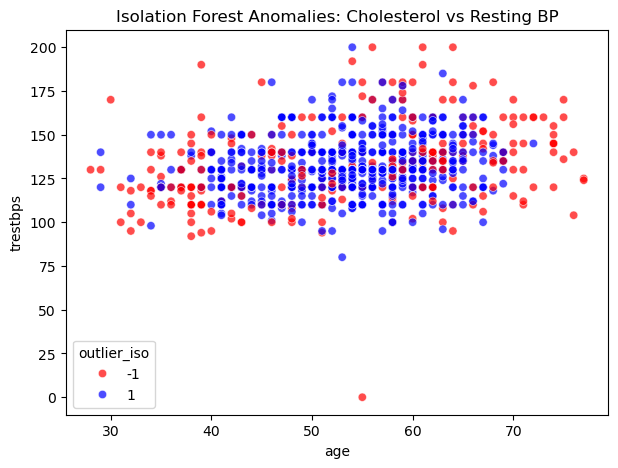

In [105]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='age', y='trestbps',
    hue='outlier_iso',
    palette={1:'blue', -1:'red'},
    data=df_encoded,
    alpha=0.7
)
plt.title("Isolation Forest Anomalies: Cholesterol vs Resting BP")
plt.show()

In [109]:
def plot_outlier_scatter(df, pairs, hue_col='outlier_iso', palette={1:'blue', -1:'red'}):
    for x, y in pairs:
        plt.figure(figsize=(5,5))
        sns.scatterplot(data=df, x=x, y=y, hue=hue_col, palette=palette, s=35, edgecolor=None)
        plt.title(f'Outliers Detected by Isolation Forest ({x} vs {y})')
        plt.xlabel(x); plt.ylabel(y)
        # Optional: nicer legend labels
        handles, labels = plt.gca().get_legend_handles_labels()
        label_map = {'1':'Inlier','-1':'Outlier'}  # because your mapping is {1:blue (inlier), -1:red (outlier)}
        labels = [label_map.get(l, l) for l in labels]
        plt.legend(handles, labels, title='Category')
        plt.tight_layout()
        plt.show()


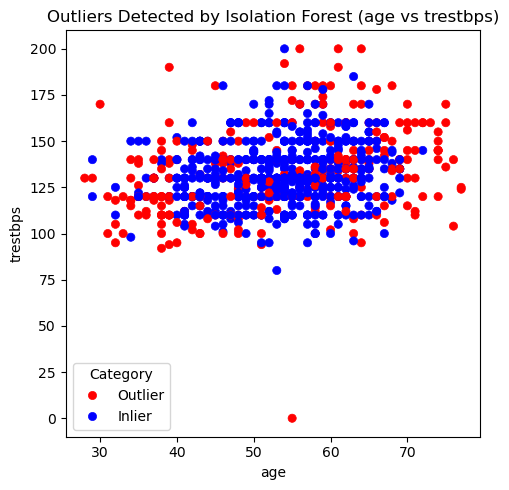

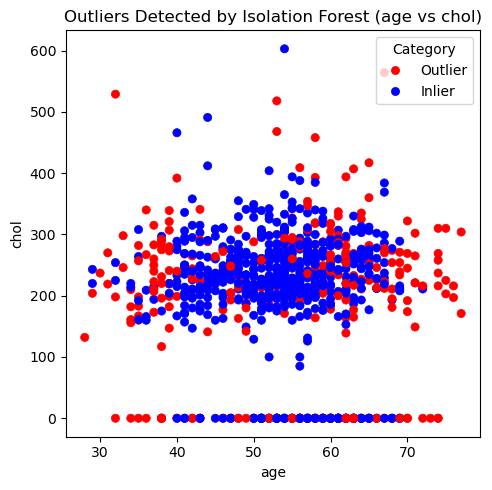

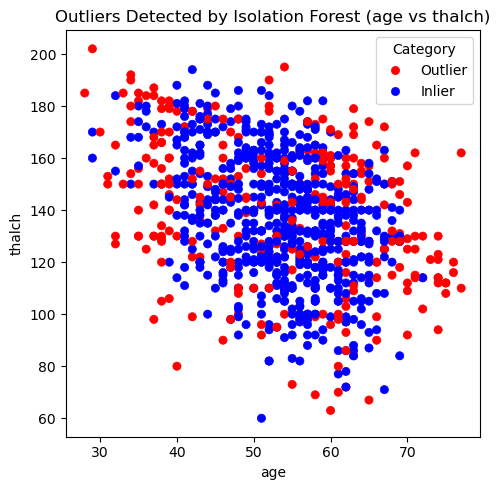

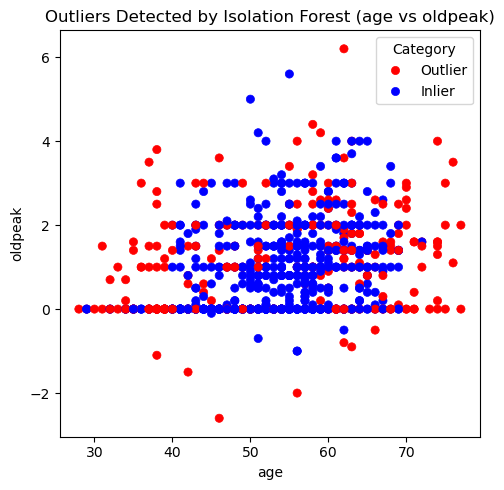

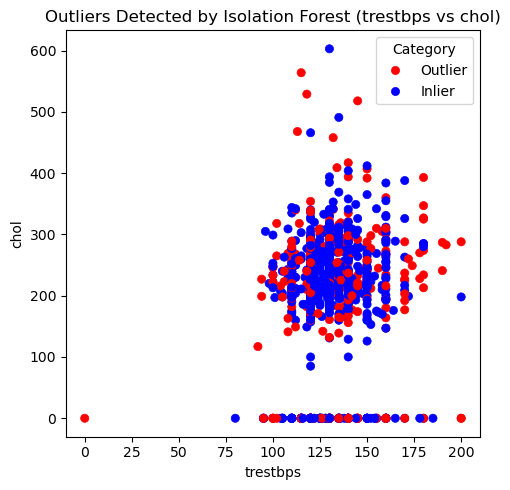

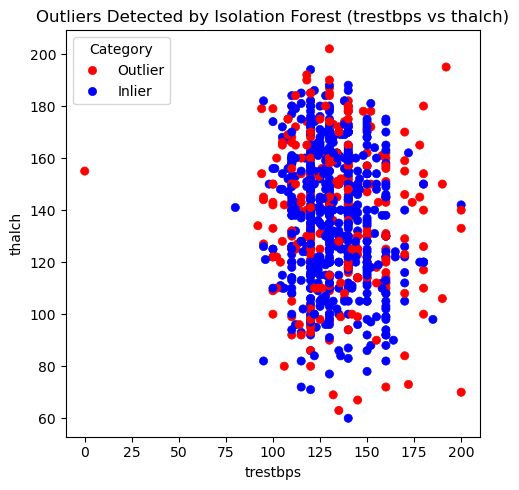

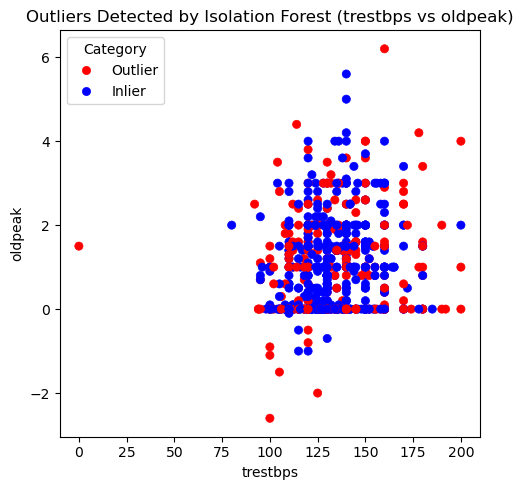

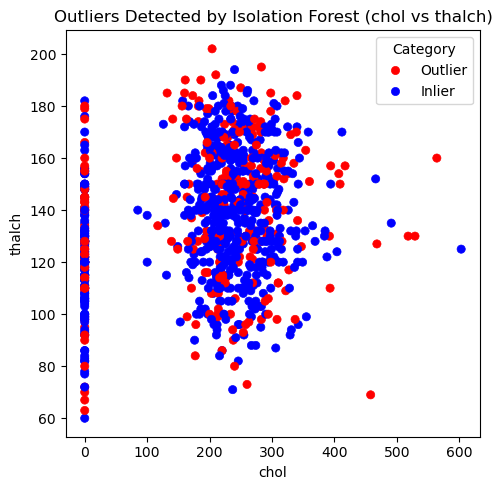

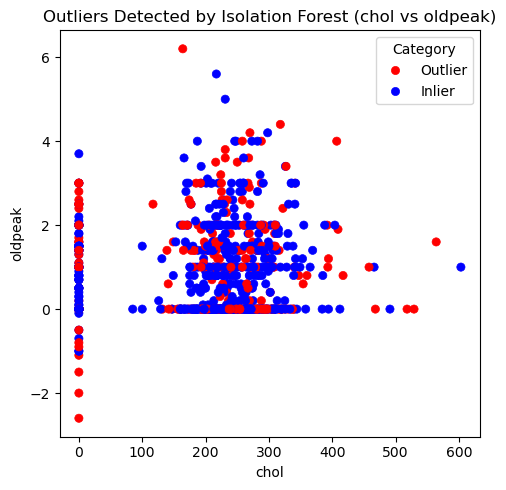

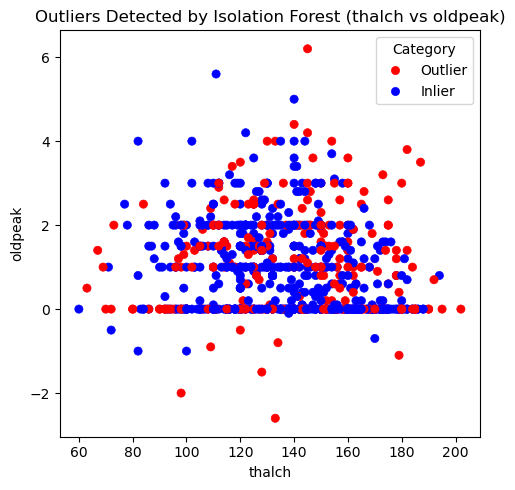

In [110]:
from itertools import combinations

num_cols = ['age','trestbps','chol','thalch','oldpeak']  # adjust if needed

all_pairs = list(combinations(num_cols, 2))
plot_outlier_scatter(df_encoded, all_pairs)

In [38]:
'''from sklearn.preprocessing import StandardScaler
df_heart_scaled = df_encoded[numeric_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_heart_scaled)
X_cols = numeric_features
print("Shape:", X_scaled.shape)
print(np.isnan(X_scaled).any())'''

'from sklearn.preprocessing import StandardScaler\ndf_heart_scaled = df_encoded[numeric_features]\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(df_heart_scaled)\nX_cols = numeric_features\nprint("Shape:", X_scaled.shape)\nprint(np.isnan(X_scaled).any())'

In [42]:
from sklearn.preprocessing import StandardScaler
X = df_encoded.drop(columns=['target'])

# Identify continuous and categorical
continuous_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'Severity Level']
categorical_cols = [col for col in X.columns if col not in continuous_cols]
scaler = StandardScaler()
X_scaled_cont = scaler.fit_transform(X[continuous_cols])
X_scaled = pd.DataFrame(X_scaled_cont, columns=continuous_cols, index=X.index)

In [44]:
X_final = pd.concat([X_scaled, X[categorical_cols]], axis=1)

In [45]:
X_final.head()

,trestbps,chol,thalch,oldpeak,Severity Level,age_bin_20-39,age_bin_40-49,age_bin_50-59,age_bin_60-69,age_bin_70-79,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,exang_False,exang_True
0,0.693846,0.303010,0.509481,1.329251,-0.871794,0,0,0,1,0,0,1,0,0,0,1,1,0
1,1.505636,0.789190,-1.153848,0.574950,0.879408,0,0,0,1,0,0,1,1,0,0,0,0,1
2,-0.659139,0.266317,-0.322184,1.612114,0.003807,0,0,0,1,0,0,1,1,0,0,0,0,1
3,-0.117945,0.458955,1.974794,2.460703,-0.871794,1,0,0,0,0,0,1,0,0,1,0,1,0
4,-0.117945,0.036987,1.380748,0.480662,-0.871794,0,1,0,0,0,1,0,0,1,0,0,1,0


In [49]:
X_final.columns

Index(['trestbps', 'chol', 'thalch', 'oldpeak', 'Severity Level',
       'age_bin_20-39', 'age_bin_40-49', 'age_bin_50-59', 'age_bin_60-69',
       'age_bin_70-79', 'sex_Female', 'sex_Male', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'exang_False', 'exang_True'],
      dtype='object')

**when contamination is 0.5**

Outlier_iso

-1    460

 1    460

 **when contamination is 0.2**
 
 outlier_iso
 
 1    736
 
-1    184

73.9% of those flagged as “anomalous” actually have heart disease (target=1).

## Hyperparameter Tuning                                                                                                         

In [50]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

In [51]:
iso = IsolationForest(random_state=42)

In [52]:
param_grid = {
    'n_estimators': [100, 200, 300],       # number of trees
    'max_samples': ['auto', 0.6, 0.8, 1.0], # samples per tree
    'contamination': [0.05, 0.1, 0.15],    # expected anomaly fraction
    'max_features': [0.5, 0.75, 1.0]       # number of features per split
}

In [55]:

# Map y: disease(1) -> -1 (positive), no-disease(0) -> 1
y_pm1 = df_encoded['target'].map({1: -1, 0: 1}).values

recall_scorer = make_scorer(recall_score, pos_label=-1)

grid = GridSearchCV(
    estimator=IsolationForest(random_state=42),
    param_grid=param_grid,
    scoring=recall_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)

grid.fit(X, y_pm1)
print(grid.best_params_, grid.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'contamination': 0.15, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 200} 0.25175023848253725


In [57]:
best_iso = grid.best_estimator_
df_heart['outlier_iso']   = best_iso.predict(X_final)
df_heart['anomaly_score'] = best_iso.decision_function(X_final)

In [58]:
df_heart['outlier_iso'] .value_counts()

outlier_iso
-1    920
Name: count, dtype: int64

In [47]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

In [48]:
y_true = np.where(df_heart_hyper['target'] == 1, -1, 1)

NameError: name 'df_heart_hyper' is not defined

In [137]:
param_grid = {
    'n_estimators':  [25, 50, 75, 100, 200, 300],     # number of trees
    'max_samples':   [64, 128, 256, 512, 1024],     # sample size per tree
    'contamination':  ['auto'], #[0.2, 0.25, 0.3, 0.5, 0.6], #['auto'] , #[0.05, 0.1, 0.2],    # anomaly fraction
    'max_depth':  [2, 3, 4],     # features per split
}

In [138]:
iso = IsolationForest(random_state=42)


In [139]:
scorers = {
    'precision': make_scorer(precision_score, pos_label=-1),
    'recall':    make_scorer(recall_score,    pos_label=-1),
    'f1':        make_scorer(f1_score,        pos_label=-1),
}


In [140]:
grid = GridSearchCV(
    estimator=iso,
    param_grid=param_grid,
    scoring=scorers,
    refit='recall',    
    cv=3,
    n_jobs=-1,
    verbose=2
)

In [141]:
grid.fit(X_scaled, y_true)


Fitting 3 folds for each of 90 candidates, totalling 270 fits


ValueError: Invalid parameter 'max_depth' for estimator IsolationForest(random_state=42). Valid parameters are: ['bootstrap', 'contamination', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'random_state', 'verbose', 'warm_start'].

In [127]:
print("Best params (by recall):", grid.best_params_)
print("Best recall:", grid.best_score_)


Best params (by recall): {'contamination': 'auto', 'max_features': 3, 'max_samples': 64, 'n_estimators': 25}
Best recall: 0.5410403565037974


In [132]:
best_iso = grid.best_estimator_
df_heart['outlier_iso']   = best_iso.predict(X_scaled)
df_heart['anomaly_score'] = best_iso.decision_function(X_scaled)

In [133]:
disease_rate = (df_heart['target']==1).mean()
print(disease_rate)

0.5532608695652174


In [134]:
df_heart['outlier_iso'] .value_counts()

outlier_iso
 1    631
-1    289
Name: count, dtype: int64

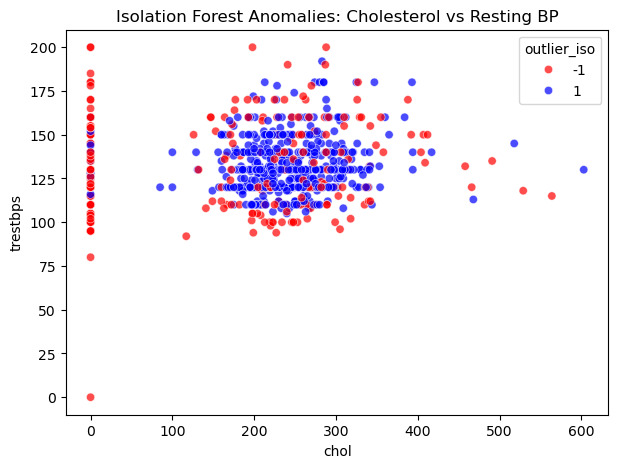

In [135]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='chol', y='trestbps',
    hue='outlier_iso',
    palette={1:'blue', -1:'red'},
    data=df_heart,
    alpha=0.7
)
plt.title("Isolation Forest Anomalies: Cholesterol vs Resting BP")
plt.show()

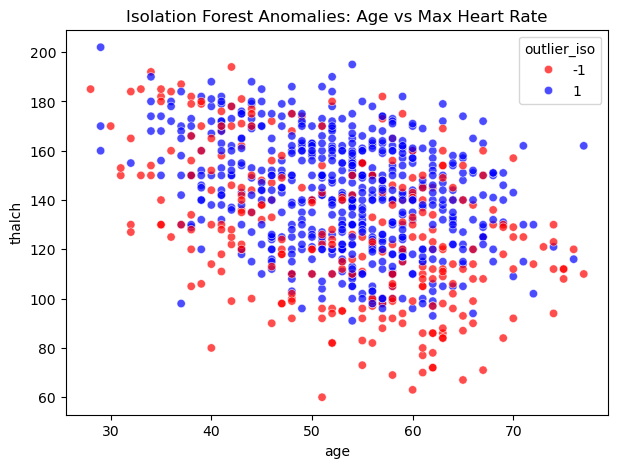

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(
    x='age', y='thalch',
    hue='outlier_iso',
    palette={1:'blue', -1:'red'},
    data=df_heart,
    alpha=0.7
)
plt.title("Isolation Forest Anomalies: Age vs Max Heart Rate")
plt.show()

In [120]:
X_healthy = X_scaled[df_heart['target']==0]
iso_2 = IsolationForest(
    n_estimators=200, 
    max_samples=128,
    contamination=0.45, 
    random_state=42
)
iso.fit(X_healthy)

df_heart['outlier_iso_2'] = iso.predict(X_scaled) 

In [121]:
df_heart['outlier_iso_2'].value_counts()

outlier_iso_2
 1    593
-1    327
Name: count, dtype: int64

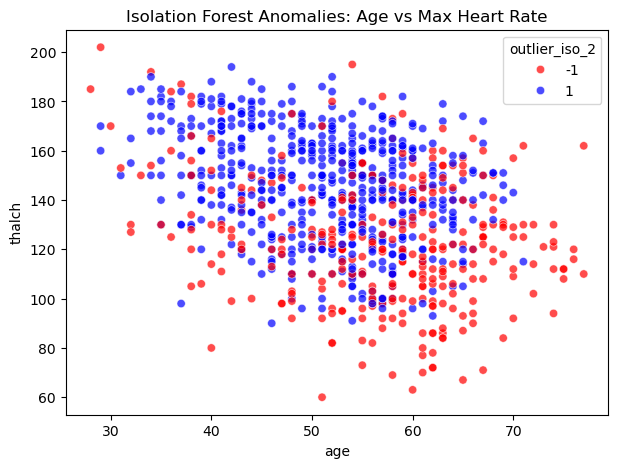

In [107]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='age', y='thalch',
    hue='outlier_iso_2',
    palette={1:'blue', -1:'red'},
    data=df_heart,
    alpha=0.7
)
plt.title("Isolation Forest Anomalies: Age vs Max Heart Rate")
plt.show()

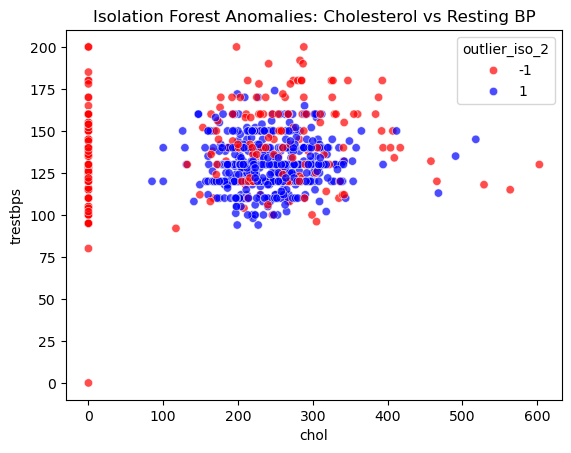

In [108]:
sns.scatterplot(
    x='chol', y='trestbps',
    hue='outlier_iso_2',
    palette={1:'blue', -1:'red'},
    data=df_heart,
    alpha=0.7
)
plt.title("Isolation Forest Anomalies: Cholesterol vs Resting BP")
plt.show()

In [58]:
X_scaled

array([[ 1.00738556,  0.67528731,  0.30590774,  0.48065292,  1.30315877],
       [ 1.43203377,  1.46248251,  0.78459895, -1.14026239,  0.56961098],
       [ 1.43203377, -0.63670469,  0.2697801 , -0.32980473,  1.5782392 ],
       ...,
       [ 0.15808914, -0.53174533,  0.21558864, -1.44900816, -0.80579114],
       [ 0.4765753 ,         nan,  1.678758  ,         nan,         nan],
       [ 0.90122351, -0.63670469,  0.49557784, -1.71916071, -0.80579114]])

In [64]:
X_cols 

['age', 'trestbps', 'chol', 'thalch', 'oldpeak']